# WORKING ON THE TITANIC DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the columns 
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# target variable is : Survived
# rest of the variables will be used as independent variables

In [6]:
#the columns which will not be used for training the data are : PassengerId , Name , Ticket 

# so we will drop these

In [7]:
dataset.drop(columns=['PassengerId','Name','Ticket'],inplace =True)

In [8]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
# splitting the dependent and the independent variables

x_data = dataset[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare', 'Cabin', 'Embarked']]

y_data = dataset['Survived']


In [10]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
y_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
#let's check for the null values in the data
x_data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
y_data.isnull().sum()

0

In [14]:
# so in the x_data we have null values present in the Age column , cabin column and embarked

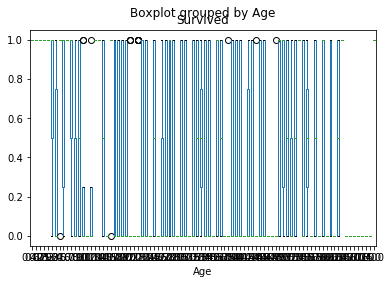

In [15]:
dataset.boxplot(by = 'Age',column = ['Survived'],grid = False)

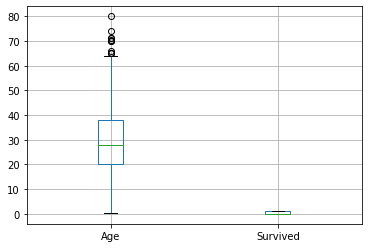

In [16]:
dataset.boxplot(column = ['Age','Survived'])

In [17]:
# we can fill the age column containing null values with the mean value
x_data.fillna({'Age':x_data.Age.median()},inplace=True)

E:\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [19]:
x_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
# dropping the null column

x_data.dropna(inplace=True)

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
x_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [22]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,female,38.0,1,0,71.2833,C85,C
3,1,female,35.0,1,0,53.1000,C123,S
6,1,male,54.0,0,0,51.8625,E46,S
10,3,female,4.0,1,1,16.7000,G6,S
11,1,female,58.0,0,0,26.5500,C103,S


In [23]:
#resetting index values
x_data.reset_index(drop =True,inplace=True)

In [24]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,female,38.0,1,0,71.2833,C85,C
1,1,female,35.0,1,0,53.1000,C123,S
2,1,male,54.0,0,0,51.8625,E46,S
3,3,female,4.0,1,1,16.7000,G6,S
4,1,female,58.0,0,0,26.5500,C103,S


In [25]:
# Handling the categorical variable

In [26]:
sex = x_data['Sex']

In [27]:
sex = pd.get_dummies(sex,drop_first=True)

In [28]:
sex

,male
0,0
1,0
2,1
3,0
4,0
...,...
197,0
198,1
199,0
200,0


In [29]:
sibsp = x_data['SibSp']

In [30]:
sibsp = pd.get_dummies(sibsp,drop_first=True)

In [31]:
sibsp.head()

,1,2,3
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [36]:
x_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [37]:
embarked = x_data['Embarked']

In [39]:
embarked = pd.get_dummies(embarked,drop_first=True)

In [40]:
embarked.head()

,Q,S
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
x_data['new_sex'] = sex

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
x_data = pd.concat([x_data,embarked],axis=1)

In [53]:
x_data = pd.concat([x_data,sibsp],axis=1)

In [60]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_sex,Q,S,1,2,3
0,1,female,38.0,1,0,71.2833,C,0,0,0,1,0,0
4,1,female,58.0,0,0,26.5500,S,0,0,1,0,0,0
5,2,male,34.0,0,0,13.0000,S,1,0,1,0,0,0
6,1,male,28.0,0,0,35.5000,S,1,0,1,0,0,0
7,1,male,19.0,3,2,263.0000,S,1,0,1,0,0,1


In [61]:
x_data.columns

Index([  'Pclass',      'Sex',      'Age',    'SibSp',    'Parch',     'Fare',
       'Embarked',  'new_sex',        'Q',        'S',          1,          2,
                3],
      dtype='object')

In [58]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_sex,Q,S,1,2,3
0,1,female,38.0,1,0,71.2833,C,0,0,0,1,0,0
4,1,female,58.0,0,0,26.5500,S,0,0,1,0,0,0
5,2,male,34.0,0,0,13.0000,S,1,0,1,0,0,0
6,1,male,28.0,0,0,35.5000,S,1,0,1,0,0,0
7,1,male,19.0,3,2,263.0000,S,1,0,1,0,0,1


In [67]:
x_data.drop(['Sex','Embarked'],inplace = True,axis=1)

In [68]:
x_data.head()

,Pclass,Age,SibSp,Parch,Fare,new_sex,Q,S,1,2,3
0,1,38.0,1,0,71.2833,0,0,0,1,0,0
4,1,58.0,0,0,26.5500,0,0,1,0,0,0
5,2,34.0,0,0,13.0000,1,0,1,0,0,0
6,1,28.0,0,0,35.5000,1,0,1,0,0,0
7,1,19.0,3,2,263.0000,1,0,1,0,0,1


In [69]:
# Now We need to scale the data in the same scale

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sd = StandardScaler()

In [72]:
scaled_x = sd.fit_transform(x_data)

In [74]:

scaled_data_dataframe = pd.DataFrame(scaled_x)

In [76]:
scaled_data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.370913,0.200406,0.884806,-0.602825,-0.071434,-1.067607,-0.143223,-1.313784,1.403620,-0.176318,-0.123718
1,-0.370913,1.541880,-0.701468,-0.602825,-0.668059,-1.067607,-0.143223,0.761160,-0.712444,-0.176318,-0.123718
2,1.571498,-0.067889,-0.701468,-0.602825,-0.848780,0.936674,-0.143223,0.761160,-0.712444,-0.176318,-0.123718
3,-0.370913,-0.470332,-0.701468,-0.602825,-0.548689,0.936674,-0.143223,0.761160,-0.712444,-0.176318,-0.123718
4,-0.370913,-1.073996,4.057355,2.123587,2.485564,0.936674,-0.143223,0.761160,-0.712444,-0.176318,8.082904


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
#xtrain,xtest,ytrain,ytest = train_test_split(scaled_data_dataframe,y_data,test_size=0.2,random_state=12)

In [82]:
scaled_data_dataframe.shape

(199, 11)

In [83]:
y_data.shape

(891,)

In [84]:
y_data = y_data[0:199]

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_data_dataframe,y_data,test_size=0.2,random_state=12)

In [86]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
predicted_values = model.predict(xtest)

In [91]:
print(predicted_values)

[0.20775426 0.62478681 0.5056198  0.20957294 0.36280829 0.67372894
 0.25036257 0.28669425 0.40711815 0.33406429 0.30498107 0.20606743
 0.32166103 0.33691734 0.32111093 0.41498115 0.24362452 0.52449092
 0.38214952 0.39143756 0.67260104 0.47467593 0.35974078 0.34825691
 0.29326926 0.26379998 0.35849057 0.24587856 0.27048411 0.30841126
 0.3504333  0.35358121 0.4706764  0.82073013 0.34799476 0.46340912
 0.18781543 0.18201047 0.45247543 0.19344433]


In [92]:
predicted_values.shape

(40,)

In [93]:
ytest.shape

(40,)

In [94]:
r2_score(ytest,predicted_values)

-0.12610056547585757

In [95]:
#overfitting problem